In [ ]:
import sys
sys.path.insert(0, '../')
from Models import Potts
# from Models.fastIsing 
import networkx as nx, matplotlib.pyplot as plt, numpy as np

n = 64
g = nx.grid_2d_graph(n, n)
# g = nx.erdos_renyi_graph(n, .2)
# g = nx.complete_graph(50)
m =  potts.Potts(graph = g, agentStates = [0, 1, 2])
# m =  Ising(graph = g, updateType = '0.25')
temps = np.logspace(-2, np.log10(g.number_of_nodes()), 50)
mag, sus = m.matchMagnetization(temps, 1000)


  0%|          | 0/50 [00:00<?, ?it/s]

Computing mag per t


  2%|▏         | 1/50 [00:37<30:33, 37.41s/it]

/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


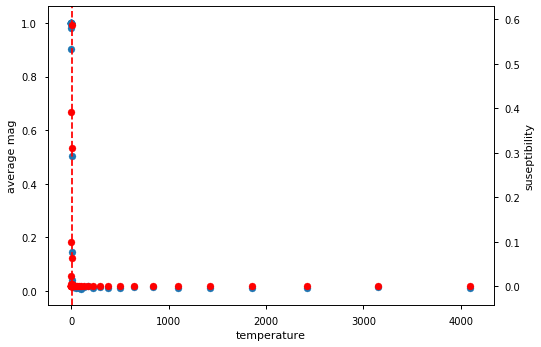

In [3]:
from matplotlib import style; style.use('seaborn-notebook')
fig, ax = plt.subplots()
ax.scatter(temps, mag)
tax = ax.twinx()
tax.scatter(temps, sus, color = 'red')
ax.set(xlabel = 'temperature', ylabel = 'average mag')
tax.set_ylabel('suseptibility')
idx = np.argmin(abs(mag - .5 * mag.max()))
ax.axvline(temps[idx], color = 'red', linestyle = 'dashed')
fig.show()

<IPython.core.display.Javascript object>


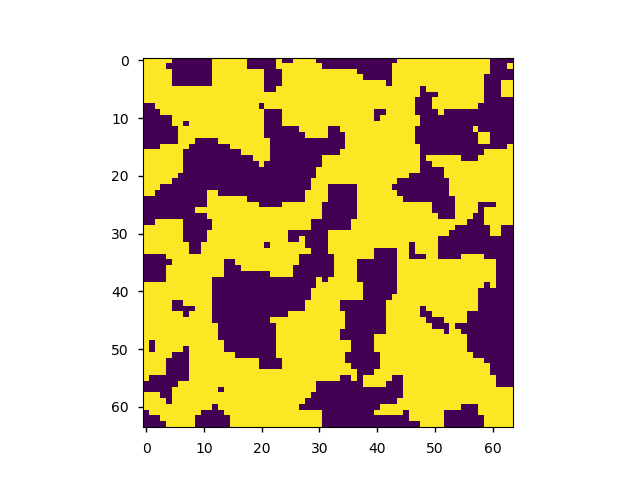

interactive(children=(IntSlider(value=0, description='time', max=99), Output()), _dom_classes=('widget-interac…

In [6]:
%matplotlib notebook
import ipywidgets as ipy
m.reset()
res = m.simulate(100)
fig, ax = plt.subplots()
h = ax.imshow(res[0].reshape(n, n))
fig.show()
@ipy.interact(time = ipy.widgets.IntSlider(min = 0, max = res.shape[0] - 1, value = 0))
def update(time):
    h.set_data(res[time].reshape(n, n))
    fig.canvas.draw(); fig.canvas.flush_events()
